In [2]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt, cm
import pysynphot as S
%matplotlib inline

In [3]:
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = 'data/MIST_v1.1_vvcrit0.4_UBVRIplus/MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'

mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

In [20]:
mist.columns

Index(['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass',
       'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U',
       'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J',
       '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp',
       'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev',
       'Gaia_RP_DR2Rev', 'TESS', 'phase'],
      dtype='object')

In [38]:
mist_massive = mist[(mist['initial_mass'] >= 8)]
mist_int = mist[(mist['initial_mass'] < 8)&(mist['initial_mass'] >= 5)]

In [36]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

(0, -10)

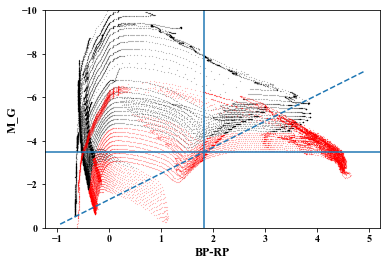

In [49]:
plt.scatter(mist_massive['Gaia_BP_DR2Rev']-mist_massive['Gaia_RP_DR2Rev'],mist_massive['Gaia_G_DR2Rev'],s=1e-2,c='k')
plt.scatter(mist_int['Gaia_BP_DR2Rev']-mist_int['Gaia_RP_DR2Rev'],mist_int['Gaia_G_DR2Rev'],s=1e-2,c='r')
plt.gca().invert_yaxis()
plt.axhline(y=-3.5)
plt.axvline(x=2.2/1.2)
abline(-1.2,-1.3)
plt.xlabel('BP-RP')
plt.ylabel('M_G')
plt.savefig('massive_intermediate_cuts')
plt.ylim(0,-10)

In [48]:
2.2/1.2

1.8333333333333335